In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [3]:
df = pd.DataFrame(toy_dataset)
df

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [4]:
#applying on-hot encoding 
te = TransactionEncoder()
td = te.fit(toy_dataset).transform(toy_dataset)

In [5]:
#creating a new dataframe from the numpy array
df = pd.DataFrame(td, columns = te.columns_)
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [6]:
# selecting items with a minimum of 60% support
f_items = apriori(df, min_support = 0.6, use_colnames = True)
f_items

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [7]:
#associating items based on confidence
item_confidence = association_rules(f_items, metric = 'confidence', min_threshold = 0.7)
item_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf,0.50
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1.00


In [8]:
#associating items based on Lift
item_lift = association_rules(f_items, metric = 'lift', min_threshold = 1.25)
item_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5


## Market Basket EDA

In [9]:
# loading the dataset
mb = pd.read_csv('Apriori/Market_Basket_Optimisation.csv')

In [10]:
#reading.hf the dataset
mb.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mb.shape

(7500, 20)

In [12]:
mb.columns.tolist()

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [13]:
# Read and process the market basket dataset
def process_transaction(transaction):
    return transaction.strip().split(',')

transactions = []
with open('Apriori/Market_Basket_Optimisation.csv', 'r') as file:
    for line in file:
        if line.strip():  # Skip empty lines
            items = process_transaction(line)
            transactions.append(items)

In [14]:
# converting to dataframe
mb_df = te.fit(transactions).transform(transactions)

In [15]:
#creating a new dataframe from the numpy array
DF = pd.DataFrame(mb_df, columns = te.columns_)
DF

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Generate frequent itemsets for market data
market_frequent_itemsets = apriori(DF, min_support=0.01, use_colnames=True)
market_frequent_itemsets


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [17]:
market_rules = association_rules(market_frequent_itemsets, metric="confidence", min_threshold=0.3)
market_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921,0.322617
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198,0.413162
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438,0.396502
...,...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597,0.492451
59,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514
60,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071,0.547034
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452


In [18]:
# Visualize top products
item_counts = pd.Series([item for transaction in transactions for item in transaction]).value_counts()
item_counts

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: count, Length: 120, dtype: int64

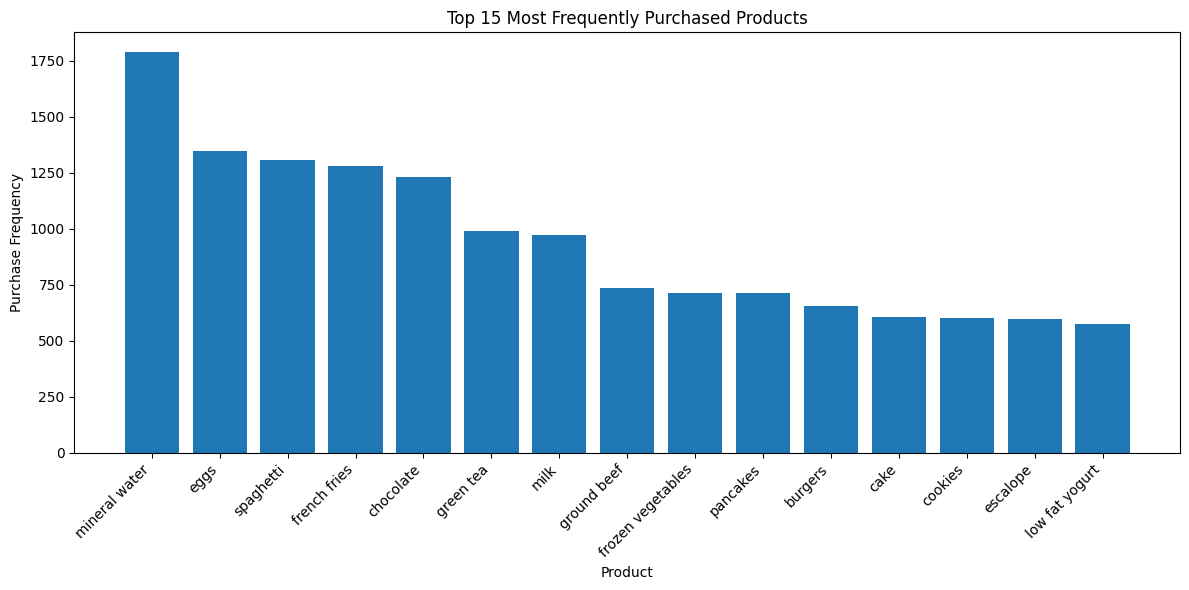

In [19]:
plt.figure(figsize=(12, 6))
top_15_items = item_counts.head(15)
plt.bar(range(len(top_15_items)), top_15_items.values)
plt.xticks(range(len(top_15_items)), top_15_items.index, rotation=45, ha='right')
plt.title('Top 15 Most Frequently Purchased Products')
plt.xlabel('Product')
plt.ylabel('Purchase Frequency')
plt.tight_layout()
plt.show()

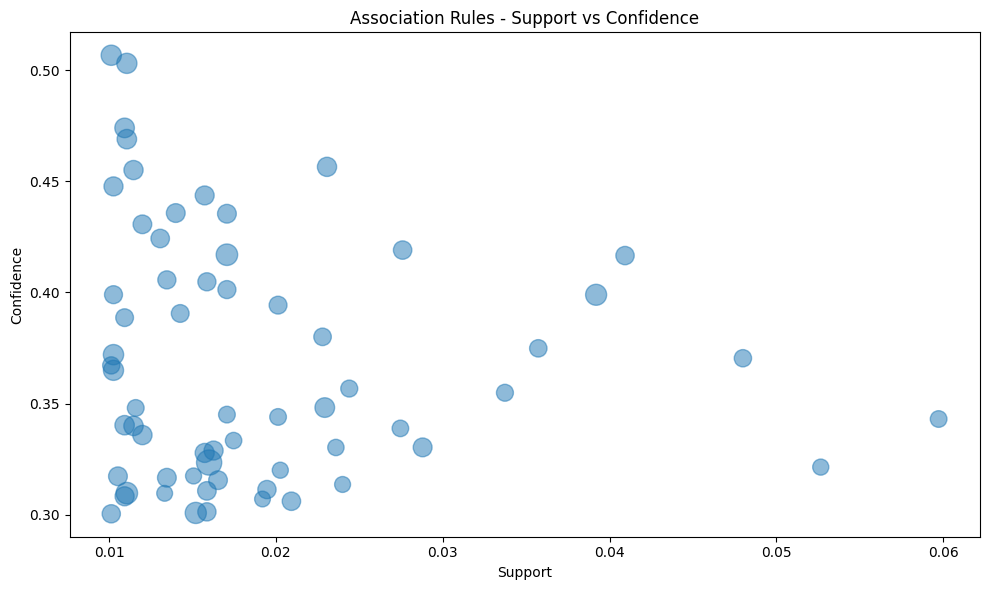

In [20]:
# Scatter plot of association rules
plt.figure(figsize=(10, 6))
plt.scatter(market_rules['support'], 
           market_rules['confidence'], 
           alpha=0.5,
           s=market_rules['lift']*100)  # Size proportional to lift

plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

In [21]:
# Print top 10 rules by lift
print("\nTop 10 Market Basket Rules by Lift:")
print(market_rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 10 Market Basket Rules by Lift:
                           antecedents      consequents   support  confidence  \
14                     (herb & pepper)    (ground beef)  0.015998    0.323450   
56        (mineral water, ground beef)      (spaghetti)  0.017064    0.416938   
51  (mineral water, frozen vegetables)           (milk)  0.011065    0.309701   
22                              (soup)           (milk)  0.015198    0.300792   
16                       (ground beef)      (spaghetti)  0.039195    0.398915   
60          (mineral water, olive oil)      (spaghetti)  0.010265    0.371981   
45                 (eggs, ground beef)  (mineral water)  0.010132    0.506667   
54                 (milk, ground beef)  (mineral water)  0.011065    0.503030   
34                          (red wine)      (spaghetti)  0.010265    0.364929   
33                         (olive oil)      (spaghetti)  0.022930    0.348178   

        lift  
14  3.291994  
56  2.394681  
51  2.389991  
22  2.32123

### Key Findings and Business Recommendations:
1. Product Placement Strategy:
Place frequently co-purchased items near each other (e.g., spaghetti near olive oil and tomato sauce)
Create dedicated sections for common meal combinations
Position high-lift pairs strategically to encourage impulse purchases
2. Promotional Recommendations:
Bundle products with strong associations (e.g., mineral water + chocolate)
Create meal deal promotions based on frequent itemsets
Implement cross-product discounts for items with high lift values
3. Inventory Management:
Maintain optimal stock levels for frequently purchased items
Coordinate inventory levels of complementary products
Use association rules to predict demand for related items
4. Marketing Initiatives:
Create targeted promotions for high-confidence product pairs
Develop recipe cards featuring commonly co-purchased ingredients
Design store layouts that highlight product associations
5. Specific Product Focus:
Key products to focus on:
Mineral water (high frequency item)
Eggs (strong associations)
Chocolate (appears in many rules)
Spaghetti (central to many meal combinations)
6. Customer Experience Enhancement:
Create recipe suggestion displays near key ingredients
Implement a smart shopping list app that suggests complementary items
Design store layout to facilitate natural product discovery
7. Seasonal Considerations:
Adjust product placement and promotions based on seasonal patterns
Create seasonal bundle offers based on discovered associations
Modify inventory planning based on seasonal demand patterns
